# Project 2
This notebook contains code for relevant parts of Project 2 in MA2501, spring 2022.

Note that the notebook only contains code for Problem 1 and 3.3, the theoretical parts are answered in the PDF.

## Requirements
Updated, specific requirements can be found in `requirements.txt`, but the short version is:
```
    numpy
    matplotlib
    
```

In [1]:
from typing import Callable

import numpy as np
import matplotlib.pyplot as plt

## Problem 1
We consider a continuous function $f : [−1, 1] → \mathbb{R}$ which we want to approximate with
different methods. Implement the Lagrange interpolation polynomial for an arbitrary set of distinct
nodes $x_0, ... , x_n$ and for values $y_0, ... , y_n$.

In [23]:
def lagrange_interpolation(x: list[float], y: list[float]) -> Callable[[float], float]:
    """Perform Lagrange interpolation of a list of points x and y, and return
        the a function of the interpolation polynomial in the Lagrange form.

    Args:
        x (list[float]): List of nodes (x-coordinates of points). Note that all
            elements in x must be distinct (x_i != x_j for all x != j)
        y (list[float]): List of values in the given nodes

    Raises:
        ValueError: Raised if x and y are not the same length, or if x contains
            any two identical elements

    Returns:
        Callable[[float], float]: A function for the Lagrange interpolation of
            the given points.
    """
    # Some generic error handling to ensure well-defined method
    if len(x) != len(y):
        raise ValueError(f"x and y must be the same length! len(x)={len(x)}, len(y)={len(y)}")
    if len(set(x)) != len(x):
        raise ValueError(f"All elements of x must be unique! Number of repeating elements: {len(x) - len(set(x))}")
    
    k = len(x)

    def basis_polynomial(in_x : float, j : int):
        return np.prod(
            [(in_x - x[m]) / (x[j] - x[m]) for m in range(k) if m != j]
        )

    
    def interpolation(x_ : float) -> float:
        """Calculate the value of the Lagrange interpolation in the point x_i

        Args:
            x_ (float): The point where the Lagrange interpolation should be
                calculated

        Returns:
            float: The value of the lagrange interpolation in point x, L(x)
        """
        return sum([
            y[j] * basis_polynomial(x_, j) for j in range(k)
        ])
    
    return interpolation

In [31]:
def lagrange_interpolation_on_points(x: list[float], y: list[float], z: list[float]) -> list[float]:
    """Return the lagrange interpolation of points (x, y) in the points z

    Args:
        x (list[float]): List of nodes (x-coordinates of points) where Lagrange
            interpolation should be performed. Note that all elements in x must
            be distinct (x_i != x_j for all x != j)
        y (list[float]): List of values in the given nodes
        z (list[float]): List of points where the Lagrange interpolation should
            be applied (i.e. z where we should find L(z)).

    Returns:
        list[float]: Values of the Lagrange interpolation applied on points z
    """
    interpolation = lagrange_interpolation(x, y)
    return [interpolation(zi) for zi in z]

Test your code on equidistant nodes and on Chebyshev nodes considering first a function $f ∈ C^∞$ defined on the interval $[−1, 1]$. Your answer to this problem should include a plot of the interpolation of the function $f(x) = \sin(πx) / (1 + 25x^2)$ with equidistant nodes and Chebyshev nodes on the interval $[−1, 1]$ with $n = 15$.

In [5]:
def f(x: float | np.ndarray) -> float | np.ndarray:
    return np.sin(np.pi * x) / (1 + 25 * np.power(x, 2))

In [24]:
N = 15
plotting_nodes = np.linspace(-1, 1, N * 10)

In [32]:
equidistant_nodes = np.linspace(-1, 1, N)
equidistant_values = f(equidistant_nodes)
equi_lagrange_values = lagrange_interpolation_on_points(
    equidistant_nodes, equidistant_values, plotting_nodes
)

In [33]:
chebyshev_nodes = np.array([
    np.cos((2*k - 1) * np.pi / (2*N)) for k in range(1, N + 1)
])
chebyshev_values = f(chebyshev_nodes)
chebyshev_lagrange_values = lagrange_interpolation_on_points(
    chebyshev_nodes, chebyshev_values, plotting_nodes
)

In [29]:
actual_values = f(plotting_nodes)

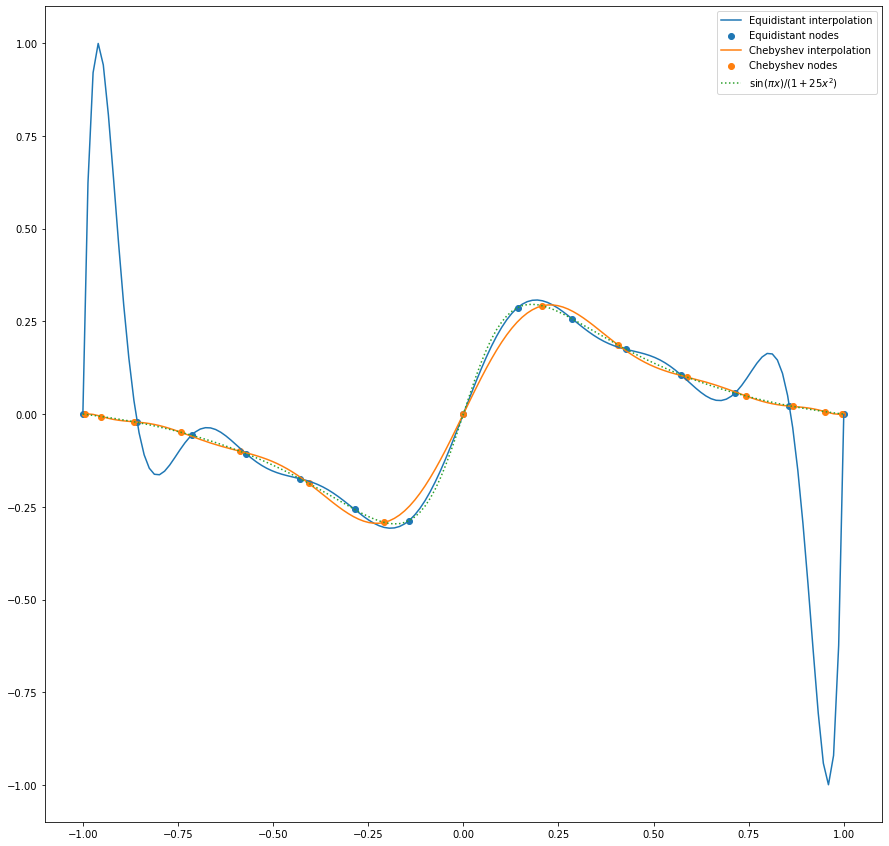

In [34]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(15, 15))
ax.plot(plotting_nodes, equi_lagrange_values, label="Equidistant interpolation")
ax.scatter(equidistant_nodes, equidistant_values, label="Equidistant nodes")
ax.plot(plotting_nodes, chebyshev_lagrange_values, label="Chebyshev interpolation")
ax.scatter(chebyshev_nodes, chebyshev_values, label="Chebyshev nodes")
ax.plot(plotting_nodes, actual_values, ":", label="$\sin(πx) / (1 + 25x^2)$")
ax.legend()

### Things to note
Observe that the interpolation with Chebyshev nodes, while slightly less accurate for small values of $x$, is highly accurate for larger absolute values of $x$, where the equidistant interpolation struggles with overfitting the points. This is very expected, as Chebyshev nodes are designed to minimize Runge's phenomenon, which is exactly this effect.

Try to calculate the error $||k_f − p_n||_∞$ numerically by $\max_{j=0,...,M} |f(z_j) − p_n (z_j)|$ using many points $z_j$ , $n << M$, and plot how the error behaves against increasing $n$.

In [43]:
M = 1500
MIN_N = 5
MAX_N = 25

In [49]:
def error_calc(function_values: np.ndarray, interpolation_values: np.ndarray) -> float:
    return np.max(np.abs(function_values - interpolation_values))

In [65]:
z = np.linspace(-1, 1, M)
function_values = f(z)

equidistant_errors = []
chebyshev_errors = []
for n in range(MIN_N, MAX_N + 1):
    # EQUIDISTANT
    xs = np.linspace(-1, 1, n)
    ys = f(xs)

    equidistant_values = np.array(lagrange_interpolation_on_points(
        xs, ys, z
    ))
    equidistant_errors.append(error_calc(function_values, equidistant_values))

    # CHEBYSHEV
    x_cheby = np.array([np.cos((2*k - 1) * np.pi / (2*n)) for k in range(1, n + 1)])
    y_cheby = f(x_cheby)
    cheby_values = np.array(lagrange_interpolation_on_points(
        x_cheby, y_cheby, z
    ))
    chebyshev_errors.append(error_calc(function_values, cheby_values))

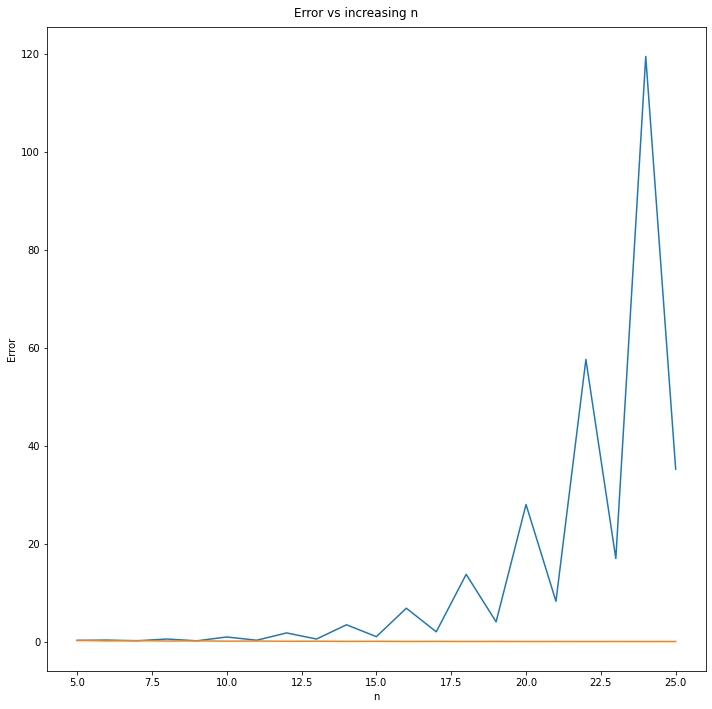

In [66]:
fig, ax = plt.subplots(nrows=1, ncols=1, figsize=(10, 10))
ax.plot(range(MIN_N, MAX_N + 1), equidistant_errors, label="Equidistant error")
ax.plot(range(MIN_N, MAX_N + 1), chebyshev_errors, label="Equidistant error")
ax.set_xlabel("n")
ax.set_ylabel("Error")
fig.suptitle("Error vs increasing n")
fig.tight_layout()

Observe that the error of the equidistant interpolation increases as $n$ increases. This indicates a classic example of overfitting - as $n$ increases, the interpolation tries to fit more and more exact to the points, increasing the effect of Runge's phenomenon. This effect is not present when using Chebyshev nodes, which is natural as that is exactly the phenomenon these nodes were designed to combat.

Just to see this in practice, plot the different equidistant interpolations, to see how they change as $n$ changes.

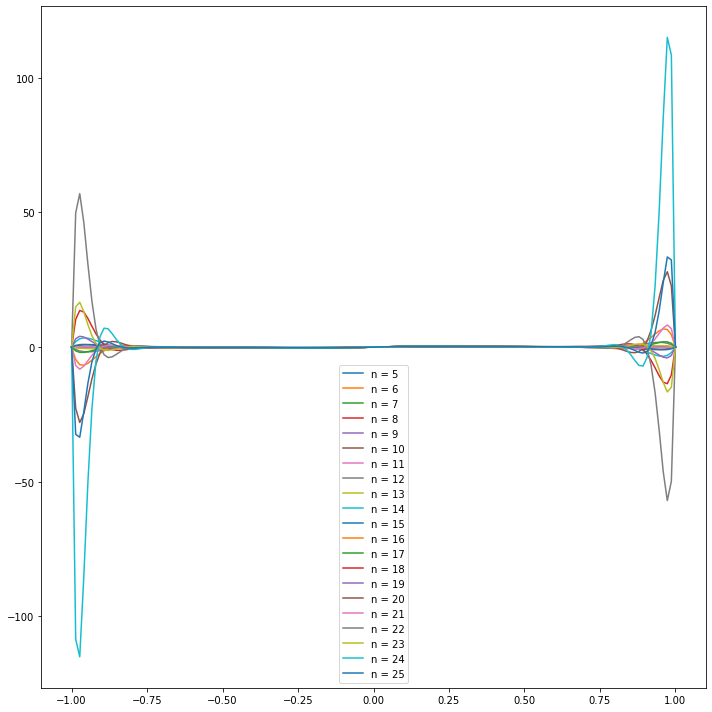

In [59]:
z = np.linspace(-1, 1, int(M / 10))
function_values = f(z)

fig, ax = plt.subplots(1, 1, figsize=(10, 10))

for n in range(MIN_N, MAX_N + 1):
    xs = np.linspace(-1, 1, n)
    ys = f(xs)
    interpolation_values = np.array(lagrange_interpolation_on_points(
        xs, ys, z
    ))
    ax.plot(z, interpolation_values, label=f"n = {n}")

# ax.plot(z, function_values, ":", label="$\sin(πx) / (1 + 25x^2)$")
ax.legend()
fig.tight_layout()